In [4]:
import pandas as pd
import wrangle
import kaggle

1. pip install kaggle
2. Log-in to Kaggle (or sign up)
3. Navigate to your Account page (click top-right profile picture)

In [5]:
# Load the data
df = wrangle.wrangle_hotel()

Using cached csv file...


1. pip install kaggle

2. Log-in to Kaggle (or sign up)

3. Navigate to your Account page (click top-right profile picture)

4. API section on the Kaggle Account page.

5. Scroll down to the API section and click Create New API Token

6. Save kaggle.json to the file path displayed in the OSError message given when attempting to import kaggle

In [6]:
df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
0,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,...,hotel clean accessible,first day swimming pool opened therefore could...,hotel clean access,first day swim pool open therefor could access...,hotel clean accessible,first day swimming pool opened therefore could...,0.4019,-0.1027,0.4019,-0.1027
1,125,8.6,Hotel Mademoiselle,United Kingdom,NaN,0,853,very good location breakfast was great,7,10,...,good location breakfast great,NaN,good locat breakfast great,NaN,good location breakfast great,NaN,0.7906,0.0000,0.7906,0.0000
2,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,...,nice excellent hotel,nothing,nice excel hotel,noth,nice excellent hotel,nothing,0.7579,0.0000,0.7579,0.0000
3,341,7.8,Novotel Amsterdam City,Austria,NaN,0,2501,Slightly out of the city center but very easy...,27,34,...,slightly city center easy get tram train reall...,NaN,slightli citi center easi get tram train reall...,NaN,slightly city center easy get tram train reall...,NaN,0.9414,0.0000,0.9414,0.0000
4,843,7.8,Hilton London Kensington Hotel,Qatar,NaN,0,3801,Great easy to reAch location,6,5,...,great easy reach location,NaN,great easi reach locat,NaN,great easy reach location,NaN,0.7964,0.0000,0.7964,0.0000


# Preperation of Paris Hotel Data

In [7]:
# show list of columns
df.columns

Index(['additional_number_of_scoring', 'average_score', 'hotel_name',
       'reviewer_nationality', 'negative_review',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'positive_review', 'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'days_since_review', 'lat', 'lng', 'trip_type', 'nights_stayed',
       'group_type', 'month', 'year', 'day_name', 'day', 'quarter',
       'negative_unique_word_count', 'positive_unique_word_count', 'street',
       'city', 'zip_code', 'country', 'positive_clean_review',
       'negative_clean_review', 'positive_stem', 'negative_stem',
       'positive_lemma', 'negative_lemma', 'pos_sentiment_score',
       'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score'],
      dtype='object')

In [8]:
# show country column
df.country.unique()

array(['United Kingdom', 'France', 'Austria', 'Netherlands', 'Italy',
       'Spain'], dtype=object)

In [9]:
# Select Paris
df_paris = df[df.city == 'Paris']

In [10]:
# View the data
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 1 to 515715
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   additional_number_of_scoring                59928 non-null  int64  
 1   average_score                               59928 non-null  float64
 2   hotel_name                                  59928 non-null  object 
 3   reviewer_nationality                        59928 non-null  object 
 4   negative_review                             43307 non-null  object 
 5   review_total_negative_word_counts           59928 non-null  int64  
 6   total_number_of_reviews                     59928 non-null  int64  
 7   positive_review                             56123 non-null  object 
 8   review_total_positive_word_counts           59928 non-null  int64  
 9   total_number_of_reviews_reviewer_has_given  59928 non-null  int64  
 10  reviewer_

In [11]:
# View null values
df_paris.isnull().sum()


additional_number_of_scoring                      0
average_score                                     0
hotel_name                                        0
reviewer_nationality                              0
negative_review                               16621
review_total_negative_word_counts                 0
total_number_of_reviews                           0
positive_review                                3805
review_total_positive_word_counts                 0
total_number_of_reviews_reviewer_has_given        0
reviewer_score                                    0
days_since_review                                 0
lat                                             382
lng                                             382
trip_type                                         0
nights_stayed                                    30
group_type                                        0
month                                             0
year                                              0
day_name    

In [12]:
df_paris.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
1,125,8.6,Hotel Mademoiselle,United Kingdom,NaN,0,853,very good location breakfast was great,7,10,...,good location breakfast great,NaN,good locat breakfast great,NaN,good location breakfast great,NaN,0.7906,0.0000,0.7906,0.0000
9,125,8.6,Hotel Mademoiselle,United Kingdom,Nothing to report,4,853,Good hotel for visiting Paris and to use as a...,27,1,...,good hotel visiting paris use base good standa...,nothing report,good hotel visit pari use base good standard a...,noth report,good hotel visiting paris use base good standa...,nothing report,0.9467,0.0000,0.9467,0.0000
36,38,9.1,Hotel du Petit Moulin,United Kingdom,NaN,0,206,We loved the hotel for it s amazing decor and...,14,2,...,loved hotel amazing decor perfect location,NaN,love hotel amaz decor perfect locat,NaN,loved hotel amazing decor perfect location,NaN,0.9081,0.0000,0.9081,0.0000
38,228,7.9,H tel Concorde Montparnasse,United Kingdom,Need better directions from Metro,6,2515,Very convenient for Gare de Montparnasse,7,9,...,convenient gare de montparnasse,need better directions metro,conveni gare de montparnass,need better direct metro,convenient gare de montparnasse,need better direction metro,0.0000,0.4404,0.0000,0.4404
39,146,7.9,Royal Hotel Champs Elys es,Australia,Room was incredibly average and the bathroom ...,29,983,Location was great Literally a two minute wal...,21,3,...,location great literally two minute walk arc d...,room incredibly average bathroom tiny like ima...,locat great liter two minut walk arc de triump...,room incred averag bathroom tini like imag web...,location great literally two minute walk arc d...,room incredibly average bathroom tiny like ima...,0.8750,0.3612,0.8834,0.3612


## Explore Questions
Does a reviewer nationality affect the score given?

Does the total amount of reviews affect the review score?

Do the tags determine the reviewer score or nationality? (i.e. does certain words attract certain guests?)

What is the distribution of the customer's home country?

In [68]:
# select average_score and review_nationality
df_paris1 = df_paris[['average_score','reviewer_nationality', 'country']]

In [19]:
# remove first column in df
df = df.drop(0)

Does not look like there is any fluctuation in score based of nationality.

Does the length of a review determine if it is negative or positive?

In [21]:
df_paris.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
1,125,8.6,Hotel Mademoiselle,United Kingdom,NaN,0,853,very good location breakfast was great,7,10,...,good location breakfast great,NaN,good locat breakfast great,NaN,good location breakfast great,NaN,0.7906,0.0000,0.7906,0.0000
9,125,8.6,Hotel Mademoiselle,United Kingdom,Nothing to report,4,853,Good hotel for visiting Paris and to use as a...,27,1,...,good hotel visiting paris use base good standa...,nothing report,good hotel visit pari use base good standard a...,noth report,good hotel visiting paris use base good standa...,nothing report,0.9467,0.0000,0.9467,0.0000
36,38,9.1,Hotel du Petit Moulin,United Kingdom,NaN,0,206,We loved the hotel for it s amazing decor and...,14,2,...,loved hotel amazing decor perfect location,NaN,love hotel amaz decor perfect locat,NaN,loved hotel amazing decor perfect location,NaN,0.9081,0.0000,0.9081,0.0000
38,228,7.9,H tel Concorde Montparnasse,United Kingdom,Need better directions from Metro,6,2515,Very convenient for Gare de Montparnasse,7,9,...,convenient gare de montparnasse,need better directions metro,conveni gare de montparnass,need better direct metro,convenient gare de montparnasse,need better direction metro,0.0000,0.4404,0.0000,0.4404
39,146,7.9,Royal Hotel Champs Elys es,Australia,Room was incredibly average and the bathroom ...,29,983,Location was great Literally a two minute wal...,21,3,...,location great literally two minute walk arc d...,room incredibly average bathroom tiny like ima...,locat great liter two minut walk arc de triump...,room incred averag bathroom tini like imag web...,location great literally two minute walk arc d...,room incredibly average bathroom tiny like ima...,0.8750,0.3612,0.8834,0.3612


In [22]:
df_paris.dtypes

additional_number_of_scoring                    int64
average_score                                 float64
hotel_name                                     object
reviewer_nationality                           object
negative_review                                object
review_total_negative_word_counts               int64
total_number_of_reviews                         int64
positive_review                                object
review_total_positive_word_counts               int64
total_number_of_reviews_reviewer_has_given      int64
reviewer_score                                float64
days_since_review                               int64
lat                                           float64
lng                                           float64
trip_type                                      object
nights_stayed                                 float64
group_type                                     object
month                                          object
year                        

In [24]:
df_paris.isnull().sum()

additional_number_of_scoring                      0
average_score                                     0
hotel_name                                        0
reviewer_nationality                              0
negative_review                               16621
review_total_negative_word_counts                 0
total_number_of_reviews                           0
positive_review                                3805
review_total_positive_word_counts                 0
total_number_of_reviews_reviewer_has_given        0
reviewer_score                                    0
days_since_review                                 0
lat                                             382
lng                                             382
trip_type                                         0
nights_stayed                                    30
group_type                                        0
month                                             0
year                                              0
day_name    

In [25]:
df_paris.positive_review = df_paris.positive_review.fillna('no positive')

In [26]:
df_paris.nights_stayed = df_paris.nights_stayed.fillna(df_paris.nights_stayed.mean())

In [27]:
#drop lat and lng columns
df_paris = df_paris.drop(['lat','lng'], axis=1)

In [28]:
df_paris.isnull().sum()

additional_number_of_scoring                      0
average_score                                     0
hotel_name                                        0
reviewer_nationality                              0
negative_review                               16621
review_total_negative_word_counts                 0
total_number_of_reviews                           0
positive_review                                   0
review_total_positive_word_counts                 0
total_number_of_reviews_reviewer_has_given        0
reviewer_score                                    0
days_since_review                                 0
trip_type                                         0
nights_stayed                                     0
group_type                                        0
month                                             0
year                                              0
day_name                                          0
day                                               0
quarter     

Data prep:
I filled NAN in neg_review with 'no negative'
I filled NAN in pos_review with 'no positive'
Filled NAN in nights stayed with average nights stayed
dropped lat and lng columns

In [29]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

np.random.seed(246)

In [30]:
# split the data
X_train_and_valid, X_test = train_test_split(df_paris, random_state=246)
X_train, X_valid = train_test_split(X_train_and_valid, random_state=246)

In [31]:
X_train.shape

(33709, 36)

In [32]:
# Select only the int and float columns
X_train_scale = X_train.select_dtypes(include=[np.int64, np.float64])

In [33]:
# split the X_train_scale into descrete and continuous dataframes
X_train_scale_discrete = X_train_scale.select_dtypes(include=[np.int64])
X_train_scale_continuous = X_train_scale.select_dtypes(include=[np.float64])

In [34]:
# MINMAX SCALER
scaler = sklearn.preprocessing.MinMaxScaler()
# fit scaler on training data
scaler.fit(X_train_scale_discrete)

MinMaxScaler()

In [35]:
X_train_scaled = scaler.transform(X_train_scale_discrete)

In [36]:
# convert X_train_scaled to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_scale_discrete.columns)

In [37]:
X_train_scaled

,additional_number_of_scoring,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,year,day,quarter,negative_unique_word_count,positive_unique_word_count
0,0.116373,0.000000,0.094774,0.023810,0.012158,0.204110,1.0,0.200000,0.000000,0.009091,0.031532
1,0.069012,0.147959,0.097248,0.113757,0.033435,0.497260,0.5,0.133333,0.666667,0.190909,0.148649
2,0.124493,0.010204,0.198980,0.015873,0.024316,0.586301,0.5,0.000000,0.333333,0.013636,0.022523
3,0.041949,0.030612,0.048856,0.026455,0.000000,0.635616,0.5,0.833333,0.333333,0.045455,0.036036
4,0.008119,0.005102,0.002474,0.103175,0.000000,0.082192,1.0,0.100000,0.333333,0.004545,0.148649
...,...,...,...,...,...,...,...,...,...,...,...
33704,0.086604,0.000000,0.064162,0.169312,0.000000,0.498630,0.5,0.100000,0.666667,0.009091,0.207207
33705,0.036536,0.153061,0.019790,0.145503,0.009119,0.020548,1.0,0.600000,0.666667,0.209091,0.211712
33706,0.031123,0.038265,0.032931,0.100529,0.075988,0.867123,0.0,0.266667,1.000000,0.054545,0.144144
33707,0.202977,0.025510,0.225417,0.042328,0.003040,0.426027,0.5,0.833333,0.666667,0.040909,0.063063


In [38]:
X_train_scale_continuous

,average_score,reviewer_score,nights_stayed,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
405782,9.3,10.0,3.0,0.6901,0.0000,0.6901,0.0000
249480,8.5,8.8,7.0,0.9337,-0.4215,0.9337,-0.4215
198509,8.3,7.5,1.0,0.0000,0.0000,0.0000,0.0000
172579,8.0,7.1,3.0,0.7184,0.0000,0.7184,0.0000
468636,9.4,10.0,3.0,0.9317,0.0000,0.9317,0.0000
...,...,...,...,...,...,...,...
248979,8.4,10.0,3.0,0.9839,0.0000,0.9839,0.0000
503827,9.0,9.6,1.0,0.9643,0.3182,0.9643,0.3182
63969,8.4,8.8,2.0,0.9118,-0.1477,0.9118,-0.1477
290790,8.1,8.3,3.0,0.7650,0.5719,0.7650,0.5719


In [39]:
result = pd.concat([X_train_scale_continuous.reset_index(), X_train_scaled.reset_index()], axis=1)

In [40]:
result.columns

Index(['index', 'average_score', 'reviewer_score', 'nights_stayed',
       'pos_sentiment_score', 'neg_sentiment_score', 'pos_lem_sentiment_score',
       'neg_lem_sentiment_score', 'index', 'additional_number_of_scoring',
       'review_total_negative_word_counts', 'total_number_of_reviews',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'days_since_review',
       'year', 'day', 'quarter', 'negative_unique_word_count',
       'positive_unique_word_count'],
      dtype='object')

In [41]:
result.head()

,index,average_score,reviewer_score,nights_stayed,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score,index,additional_number_of_scoring,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,year,day,quarter,negative_unique_word_count,positive_unique_word_count
0,405782,9.3,10.0,3.0,0.6901,0.0000,0.6901,0.0000,0,0.116373,0.000000,0.094774,0.023810,0.012158,0.204110,1.0,0.200000,0.000000,0.009091,0.031532
1,249480,8.5,8.8,7.0,0.9337,-0.4215,0.9337,-0.4215,1,0.069012,0.147959,0.097248,0.113757,0.033435,0.497260,0.5,0.133333,0.666667,0.190909,0.148649
2,198509,8.3,7.5,1.0,0.0000,0.0000,0.0000,0.0000,2,0.124493,0.010204,0.198980,0.015873,0.024316,0.586301,0.5,0.000000,0.333333,0.013636,0.022523
3,172579,8.0,7.1,3.0,0.7184,0.0000,0.7184,0.0000,3,0.041949,0.030612,0.048856,0.026455,0.000000,0.635616,0.5,0.833333,0.333333,0.045455,0.036036
4,468636,9.4,10.0,3.0,0.9317,0.0000,0.9317,0.0000,4,0.008119,0.005102,0.002474,0.103175,0.000000,0.082192,1.0,0.100000,0.333333,0.004545,0.148649


In [42]:
# look for correlations between variables
corr = result.corr()

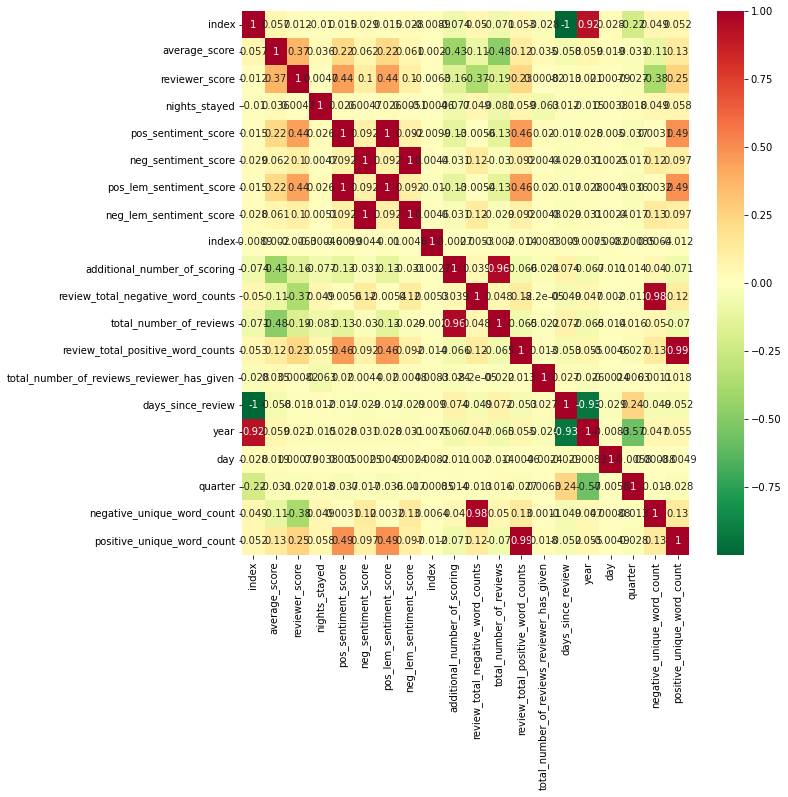

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='RdYlGn_r')
plt.show()

Take aways form heat map:

Target is reviewer score

Correlations:

- +0.37 average score

- +0.44 pos sentiment and pos lem sentiment

- -0.37 review total negative word count

- -0.38 negative unique word count

- +0.25 pos unique word count

In [44]:
# drop columns
columns_to_keep = ['reviewer_score', 'average_score', 'pos_sentiment_score', 'pos_lem_sentiment_score', 'review_total_negative_word_counts', 'review_total_positive_word_counts', 'negative_unique_word_count', 'positive_unique_word_count']

# create a new df with columns to keep
X_train_scaled_new = result[columns_to_keep]

In [45]:
X_train_scaled_new.head()

,reviewer_score,average_score,pos_sentiment_score,pos_lem_sentiment_score,review_total_negative_word_counts,review_total_positive_word_counts,negative_unique_word_count,positive_unique_word_count
0,10.0,9.3,0.6901,0.6901,0.000000,0.023810,0.009091,0.031532
1,8.8,8.5,0.9337,0.9337,0.147959,0.113757,0.190909,0.148649
2,7.5,8.3,0.0000,0.0000,0.010204,0.015873,0.013636,0.022523
3,7.1,8.0,0.7184,0.7184,0.030612,0.026455,0.045455,0.036036
4,10.0,9.4,0.9317,0.9317,0.005102,0.103175,0.004545,0.148649


In [46]:
target = X_train_scaled_new.reviewer_score

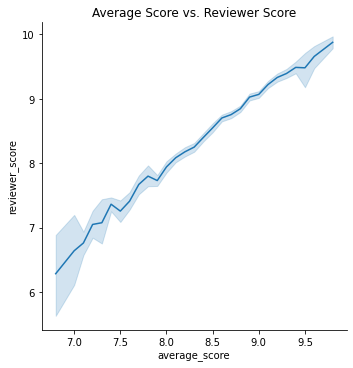

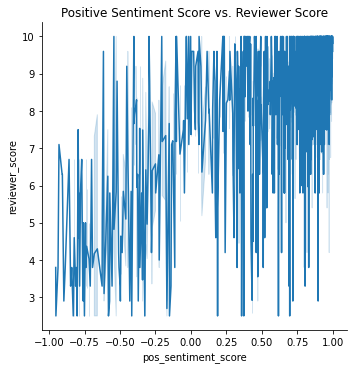

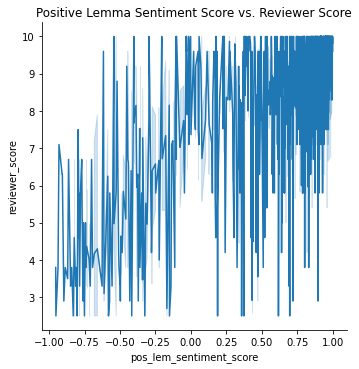

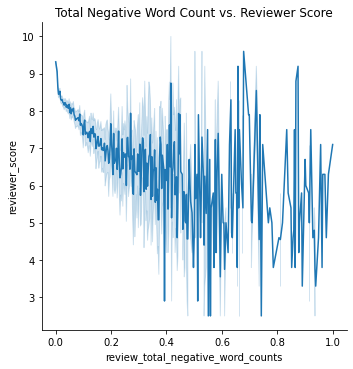

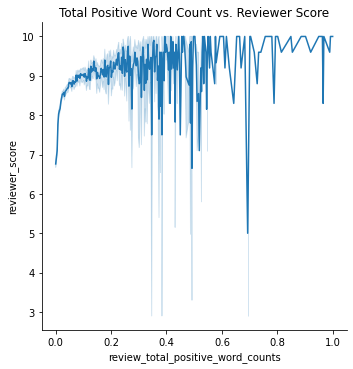

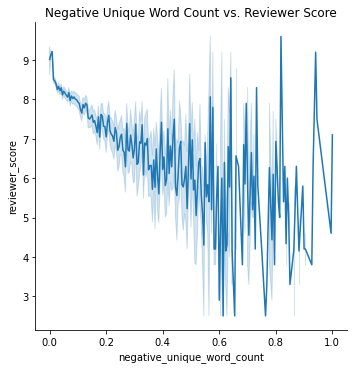

In [47]:
# plot the distribution of the target variable
sns.relplot(x='average_score', y=target, data=X_train_scaled_new, kind='line')
plt.title('Average Score vs. Reviewer Score')
plt.show()
sns.relplot(x='pos_sentiment_score', y=target, data=X_train_scaled_new, kind='line')
plt.title('Positive Sentiment Score vs. Reviewer Score')
plt.show()
sns.relplot(x='pos_lem_sentiment_score', y=target, data=X_train_scaled_new, kind='line')
plt.title('Positive Lemma Sentiment Score vs. Reviewer Score')
plt.show()
sns.relplot(x='review_total_negative_word_counts', y=target, data=X_train_scaled_new, kind='line')
plt.title('Total Negative Word Count vs. Reviewer Score')
plt.show()
sns.relplot(x='review_total_positive_word_counts', y=target, data=X_train_scaled_new, kind='line')
plt.title('Total Positive Word Count vs. Reviewer Score')
plt.show()
sns.relplot(x='negative_unique_word_count', y=target, data=X_train_scaled_new, kind='line')
plt.title('Negative Unique Word Count vs. Reviewer Score')
plt.show()

Setiment analysis scores 

In [48]:
df.head()

,reviewer_nationality,average_score
1,Abkhazia Georgia,8.320000
2,Afghanistan,8.600000
3,Albania,8.282143
4,Algeria,8.222222
5,Andorra,8.960000


In [49]:
words = ['nothing', 'n', 'none', 'nothing really', 'good', 'nothing dislike', 'liked everything', 'everything perfect', 'nil', 'nothing complain', 'nothing say']

# spell checker/Clustering

In [50]:
from textblob import TextBlob 
from textblob import Word

from sklearn.feature_extraction.text import CountVectorizer
import nltk 
from nltk.corpus import stopwords

In [51]:
df = wrangle.wrangle_hotel()

Using cached csv file...


In [52]:
df.head()

,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,...,positive_clean_review,negative_clean_review,positive_stem,negative_stem,positive_lemma,negative_lemma,pos_sentiment_score,neg_sentiment_score,pos_lem_sentiment_score,neg_lem_sentiment_score
0,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,...,hotel clean accessible,first day swimming pool opened therefore could...,hotel clean access,first day swim pool open therefor could access...,hotel clean accessible,first day swimming pool opened therefore could...,0.4019,-0.1027,0.4019,-0.1027
1,125,8.6,Hotel Mademoiselle,United Kingdom,NaN,0,853,very good location breakfast was great,7,10,...,good location breakfast great,NaN,good locat breakfast great,NaN,good location breakfast great,NaN,0.7906,0.0000,0.7906,0.0000
2,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,...,nice excellent hotel,nothing,nice excel hotel,noth,nice excellent hotel,nothing,0.7579,0.0000,0.7579,0.0000
3,341,7.8,Novotel Amsterdam City,Austria,NaN,0,2501,Slightly out of the city center but very easy...,27,34,...,slightly city center easy get tram train reall...,NaN,slightli citi center easi get tram train reall...,NaN,slightly city center easy get tram train reall...,NaN,0.9414,0.0000,0.9414,0.0000
4,843,7.8,Hilton London Kensington Hotel,Qatar,NaN,0,3801,Great easy to reAch location,6,5,...,great easy reach location,NaN,great easi reach locat,NaN,great easy reach location,NaN,0.7964,0.0000,0.7964,0.0000


In [53]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

In [54]:
# clustering
X = df[['review_total_positive_word_counts', 'pos_sentiment_score']]

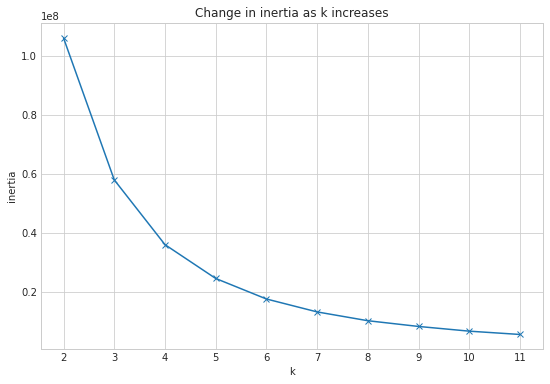

In [55]:
# Check the inertia of the KMeans model
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [56]:
# KMeans with k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [57]:
# Add a column to the iris dataframe called cluster
df['cluster1'] = kmeans.predict(X)

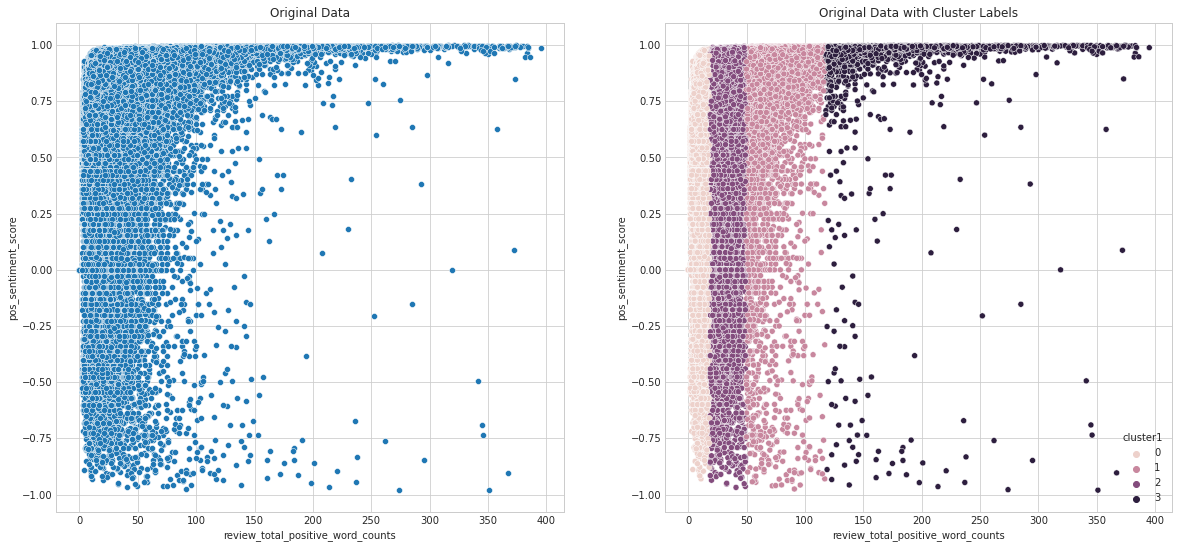

In [58]:
# create three subplots with original data, actual species, and cluster assignments
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(20, 9))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='review_total_positive_word_counts', y='pos_sentiment_score', data=df)
    plt.title('Original Data')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='review_total_positive_word_counts', y='pos_sentiment_score', hue='cluster1', data=df)
    plt.title('Original Data with Cluster Labels')

In [59]:
def cluster(df, feature1, feature2, k):
    X = df[[feature1, feature2]]

    kmeans = KMeans(n_clusters=k).fit(X)
    
    df['cluster'] = kmeans.predict(X)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    
    plt.figure(figsize=(14, 9))
    
    for cluster, subset in df.groupby('cluster'):
        plt.scatter(subset[feature2], subset[feature1], label='cluster ' + str(cluster), alpha=.6)
    
    centroids.plot.scatter(y=feature1, x=feature2, c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')
    
    plt.legend()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Visualizing Cluster Centers')

    return

/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


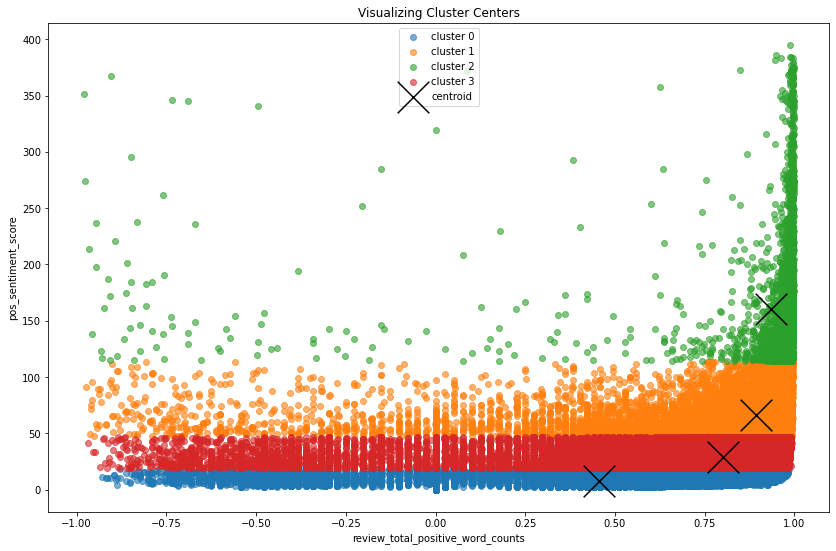

In [60]:
cluster(df, 'review_total_positive_word_counts', 'pos_sentiment_score', 4)

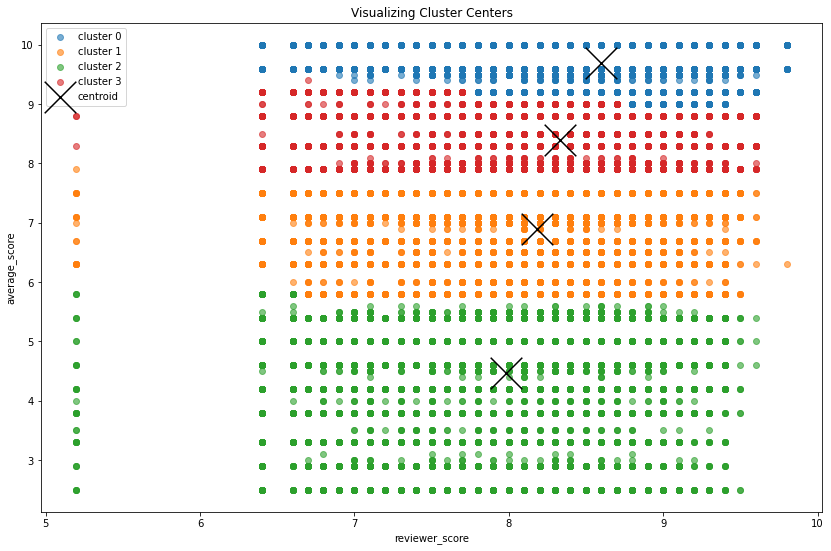

In [61]:
cluster(df, 'reviewer_score', 'average_score', 4) 

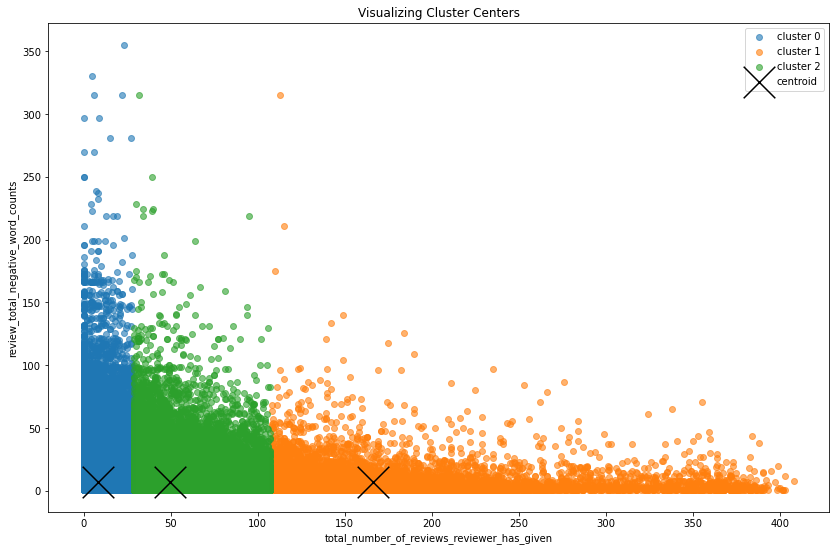

In [62]:
cluster(df, 'total_number_of_reviews_reviewer_has_given', 'review_total_negative_word_counts', 3)

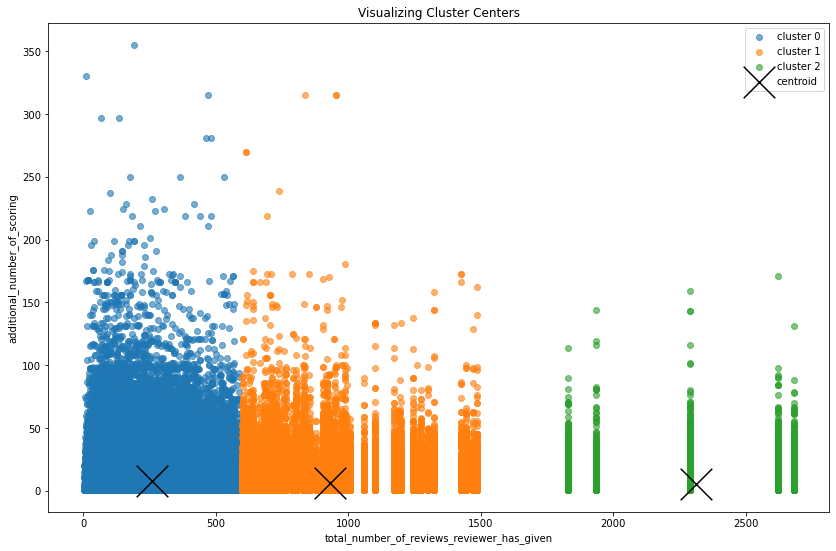

In [63]:
cluster(df, 'total_number_of_reviews_reviewer_has_given', 'additional_number_of_scoring', 3)